In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
rolls = {}
for i in range(1,21):
    rolls[f"{i}"] = []

with open("chat_logs.txt", "r") as logs:
    for line in logs:
        for i in range(1,21):
            if line[0] == "@":
                if "d20" in line:
                    if f"({i})" in line or f"+{i})" in line or f"({i}+" in line or f"+{i}+" in line:
                          rolls[f"{i}"].append(line.split(":")[0])
                  
people = []
for value in rolls.values():
    for person in value:
        if person.split(":")[0] not in people:
            people.append(person.split(":")[0])
data = {}
for person in people:
    data[person] = {}
    for i in range(1,21):
        data[person][f"{i}"] = 0

for person in people:
    for key, value in rolls.items():
        for i in range(len(value)):
            if person in value[i]:
                data[person][key] += 1

with open("graphs.txt", "r") as in_file:
    for line in in_file:
        path = line

In [3]:
df = pd.DataFrame(data, )

In [4]:
df.index = df.index.map(lambda x: int(x))

In [5]:
df1 = df.sort_index()

In [6]:
df1["sum"] = df1.sum(axis=1)
df1["sum"] = df1["sum"].map(lambda x: int(x))
df1

,@Utgarm Jassan,@Keros,"@Carmel, of the Wilds",@Varis & Delphi,"@Strahd, but a Halloween Costume",@Robin Hangedlyn & Robin Jr,sum
1,4,3,10,6,12,6,41
2,8,9,7,4,8,2,38
3,9,7,7,7,9,7,46
4,9,10,9,6,12,1,47
5,6,4,7,6,14,13,50
6,6,4,6,8,12,6,42
7,9,10,7,1,11,10,48
8,9,4,10,9,15,5,52
9,8,4,11,8,13,4,48
10,8,4,5,6,13,9,45


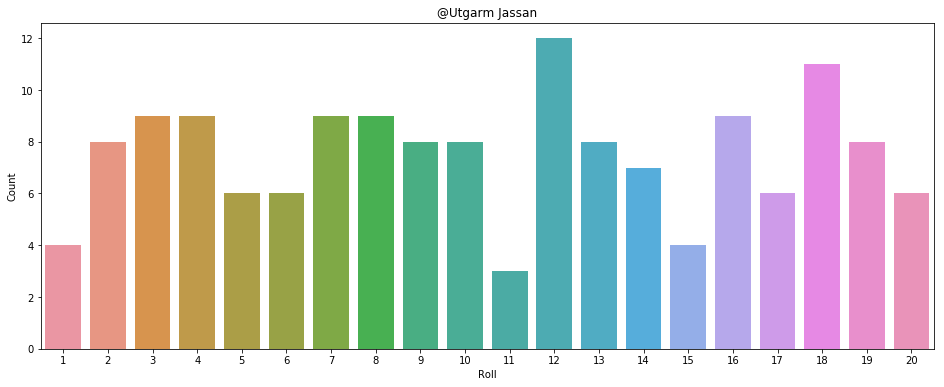

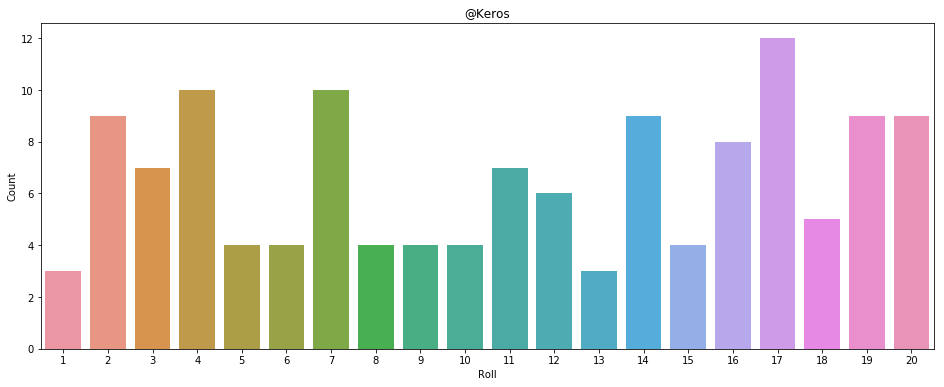

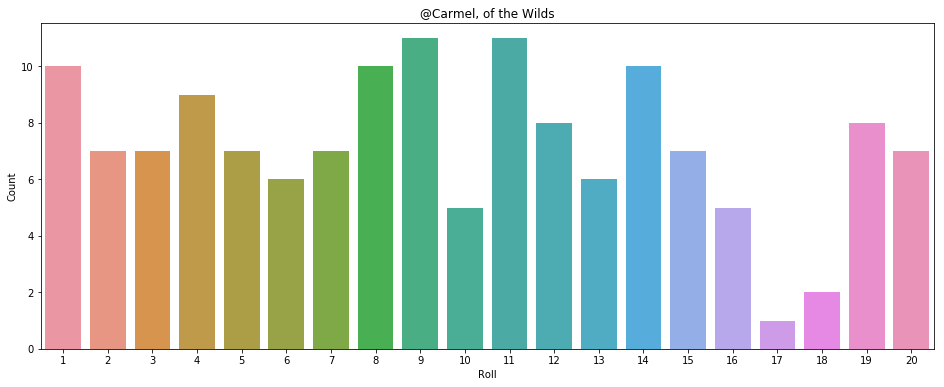

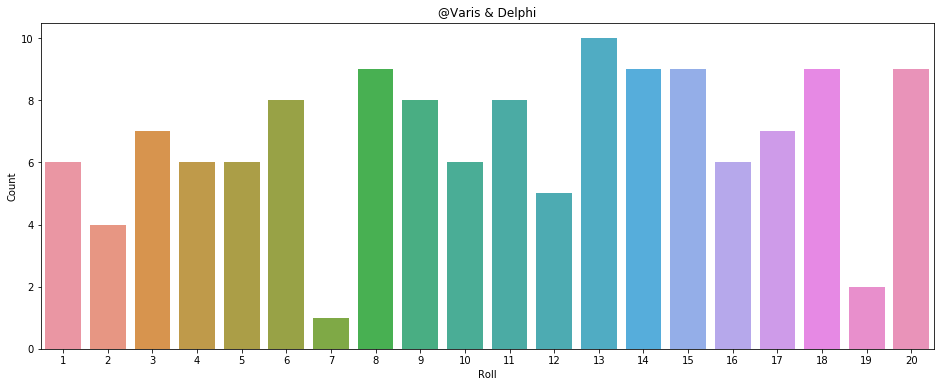

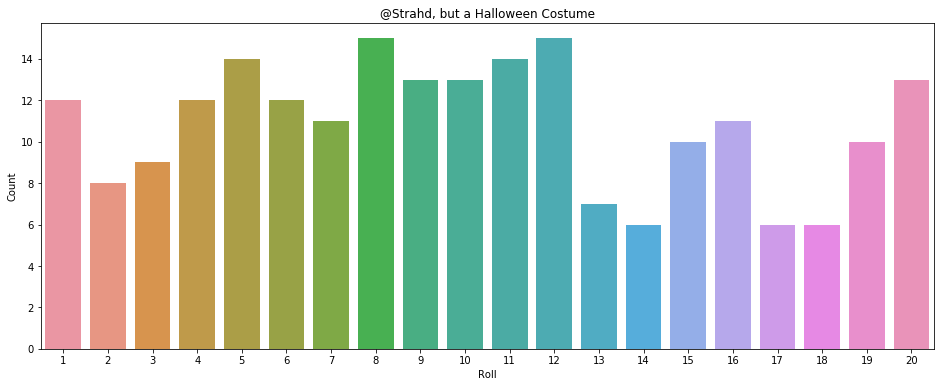

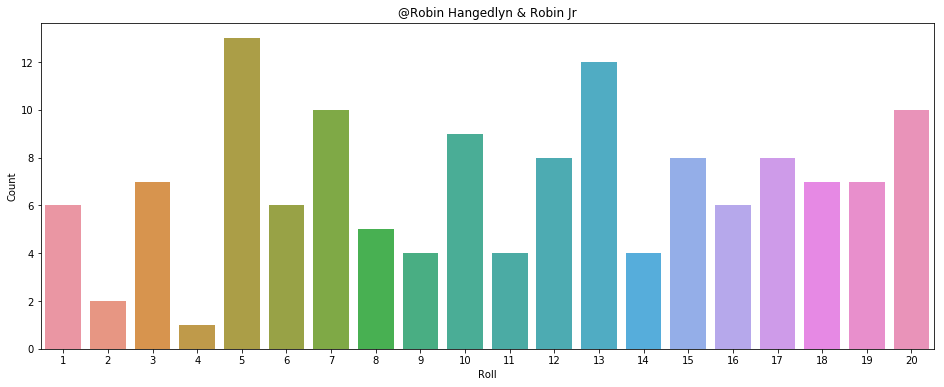

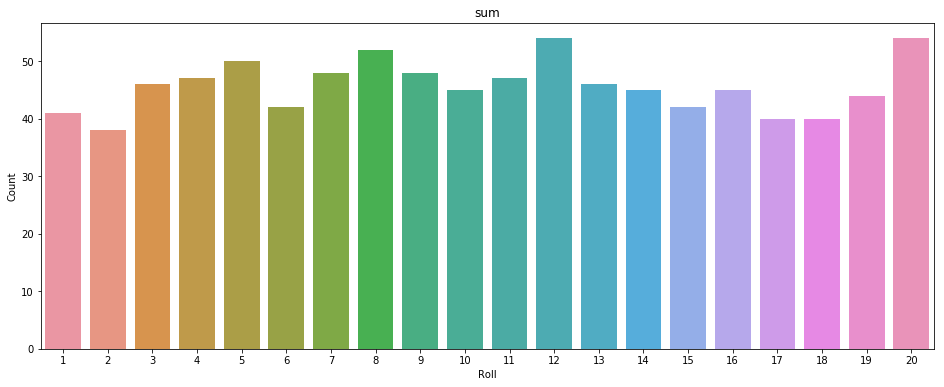

In [24]:
for person in df1.columns:
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = df1.index, y = df1[person])
    ax.set_ylabel("Count")
    ax.set_xlabel("Roll")
    ax.set_title(person)
    fig = ax.get_figure()
    fig.savefig(f"{path}/{person}")

In [8]:
data1 = {}
for person in df1.columns:
    data = []
    x = 1
    for value in df1[person]:
        for i in range(value):
            data.append(x)
        x += 1
    data1[person] = data


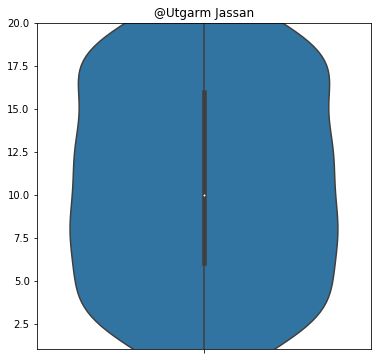

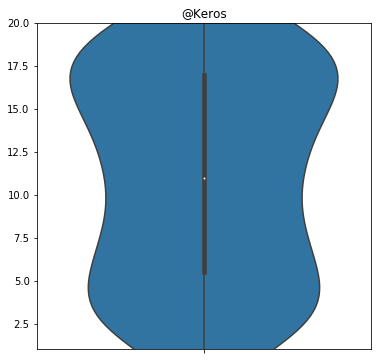

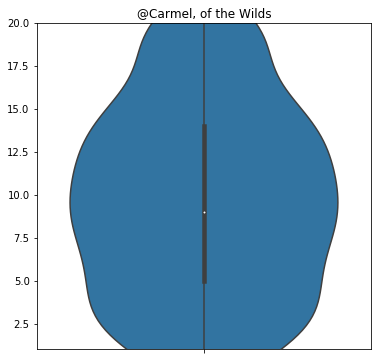

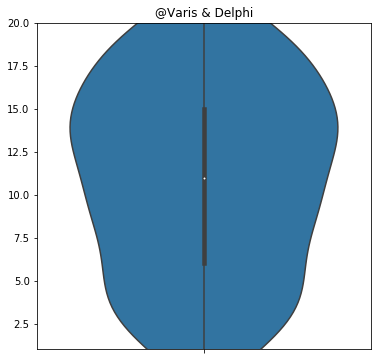

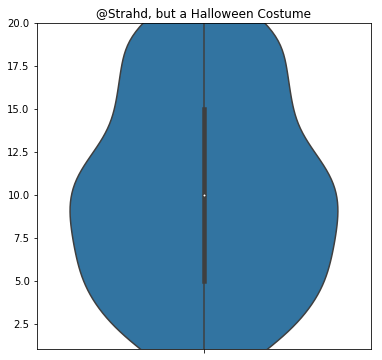

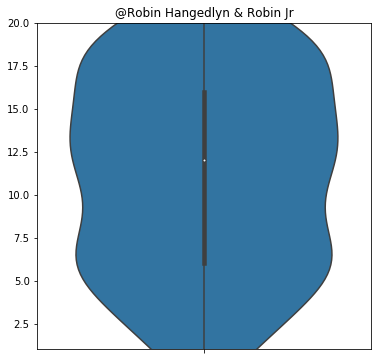

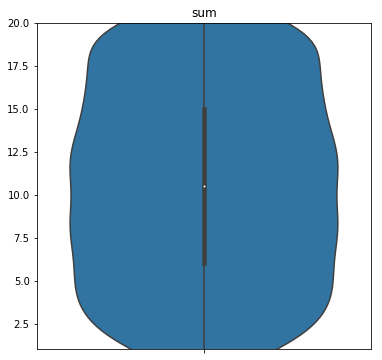

In [23]:
for person in data1.keys():
    plt.figure(figsize=(6, 6))
    ax = sns.violinplot(y = data1[person])
    ax.set_title(person)
    plt.ylim(1, 20)
    fig = ax.get_figure()
    fig.savefig(f"{path}/{person}_v_plot")

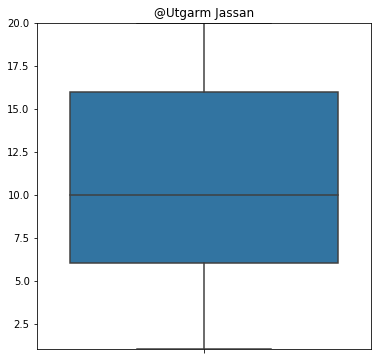

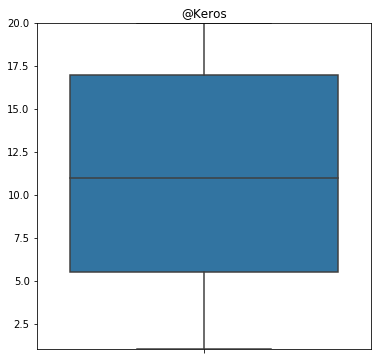

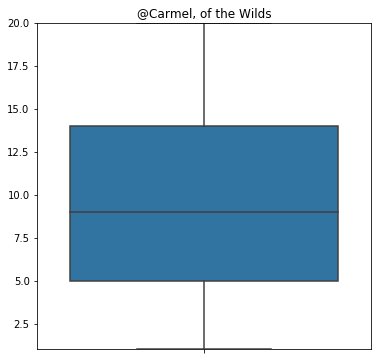

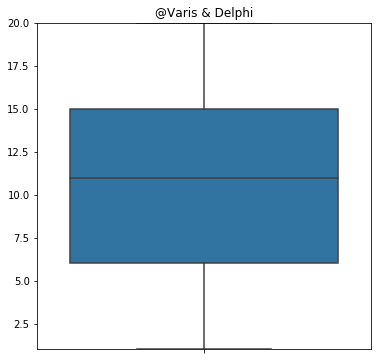

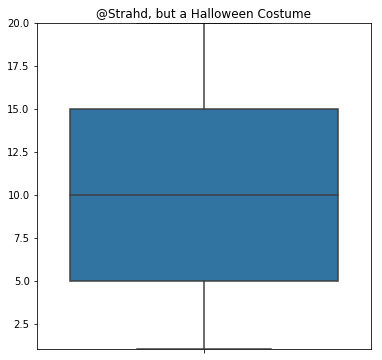

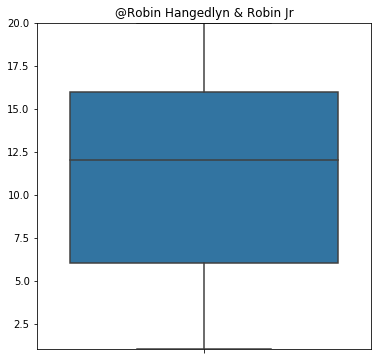

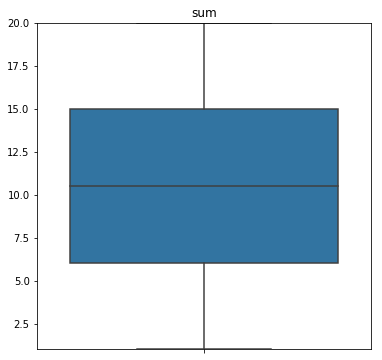

In [22]:
for person in data1.keys():
    plt.figure(figsize=(6, 6))
    ax = sns.boxplot(y = data1[person])
    ax.set_title(person)
    plt.ylim(1, 20)
    fig = ax.get_figure()
    fig.savefig(f"{path}/{person}_b_plot")

In [ ]:
df1.to_csv(path_or_buf=f"{path}/data_frame.csv")